# ⚛️ H₂ VQE — Fermion-to-Qubit Mapping Comparison (Noiseless)

This notebook compares **fermion-to-qubit mappings** for the hydrogen molecule **H₂**
using a fixed VQE setup and your packaged VQE engine.

We vary only the **mapping**:

- `jordan_wigner`
- `bravyi_kitaev`
- `parity`

Everything else is held constant:

- Molecule: **H₂** (equilibrium geometry, STO-3G)
- Ansatz: **UCCSD** (singles + doubles)
- Optimizer: **Adam**
- Device: `default.qubit` (noiseless)
- Steps: 60

---

## 🎯 Goals

For each mapping, we obtain:

1. **Hamiltonian complexity** (number of Pauli terms)
2. **VQE convergence trace** (energy vs iteration)
3. **Final ground-state energy**

This helps illustrate how different encodings affect:

- Hamiltonian length (Pauli term count)
- Optimisation behaviour
- Resource requirements

while keeping the underlying chemistry and ansatz fixed.

---

Internally, we use the high-level API:

```python
from vqe.core import run_vqe_mapping_comparison
```

which:

- Builds the qubit Hamiltonian for each mapping
- Calls `run_vqe` for each case
- Reuses the caching & plotting infrastructure
- Returns a summary dictionary for downstream analysis


## 🔧 Imports & Configuration

In [1]:
import matplotlib.pyplot as plt
from pennylane import numpy as np

from vqe.core import run_vqe_mapping_comparison

mappings = ["jordan_wigner", "bravyi_kitaev", "parity"]

print("Mappings to compare:", mappings)

Mappings to compare: ['jordan_wigner', 'bravyi_kitaev', 'parity']


## 🚀 Run VQE Mapping Comparison (Package API)

We now call:

```python
run_vqe_mapping_comparison(
    molecule="H2",
    ansatz_name="UCCSD",
    optimizer_name="Adam",
    mappings=mappings,
    steps=60,
    stepsize=0.2,
    noisy=False,
)
```

This function:

- Builds the molecular Hamiltonian for each mapping
- Runs VQE with the chosen ansatz and optimizer
- Produces a convergence plot (energy vs iteration) saved to `IMG_DIR`
- Returns, for each mapping:

```python
{
    "final_energy": float,
    "energies": [...],
    "num_qubits": int,
    "num_terms": int or None,
}
```


🔍 Comparing mappings for H2 (UCCSD, Adam)

⚙️ Running mapping: jordan_wigner

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2__UCCSD__Adam__VQE__noiseless__s0__83090ebcace3.json

⚙️ Running mapping: bravyi_kitaev
⚠️  Mapping 'bravyi_kitaev' requested but could not be applied via conversion path.
    Proceeding with the default mapping used by the Hamiltonian builder.
    Details: PennyLane 'to_openfermion' not available in this environment.
⚠️  Mapping 'bravyi_kitaev' requested but could not be applied via conversion path.
    Proceeding with the default mapping used by the Hamiltonian builder.
    Details: PennyLane 'to_openfermion' not available in this environment.

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2__UCCSD__Adam__VQE__noiseless__s0__0f44ded8f323.json

⚙️ Running mapping: parity
⚠️  Mapping 'parity' requested but could not be applied via conversion path.
    Proceeding with the default mapping used by 

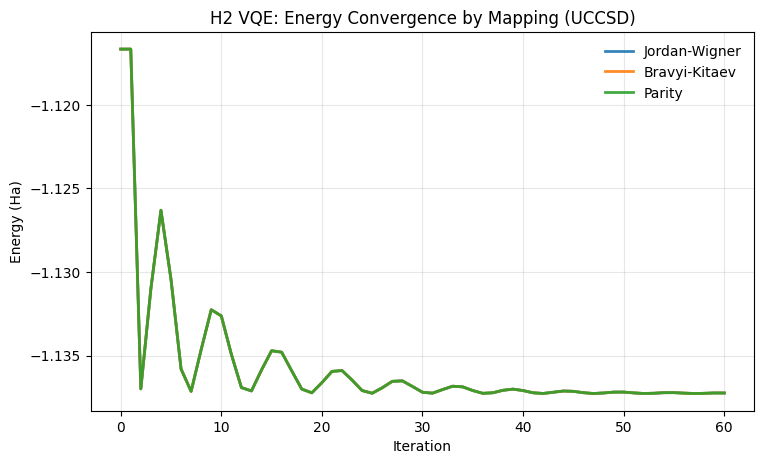

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/mapping_comparison_UCCSD_Adam.png

📉 Saved mapping comparison plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2/mapping_comparison_UCCSD_Adam.png
Results Summary:
  jordan_wigner   → E = -1.13723978 Ha, Qubits = 4, Terms = 15
  bravyi_kitaev   → E = -1.13723978 Ha, Qubits = 4, Terms = 15
  parity          → E = -1.13723978 Ha, Qubits = 4, Terms = 15


{'jordan_wigner': {'final_energy': -1.1372397785358366,
  'energies': [-1.116684387246929,
   -1.116684387246929,
   -1.1369940251463477,
   -1.1310074568947168,
   -1.126316409597222,
   -1.1304474002018505,
   -1.1358062153442268,
   -1.1371414324943363,
   -1.1346418110223002,
   -1.1322641480071687,
   -1.132629155736852,
   -1.1349293790127926,
   -1.1369150019122078,
   -1.1371156851201913,
   -1.1358626470254827,
   -1.134713095692967,
   -1.1348007937644733,
   -1.1359148715049634,
   -1.1370056617779831,
   -1.1372291497955778,
   -1.1366222692189383,
   -1.1359492613449873,
   -1.135897934851662,
   -1.1364663962294224,
   -1.137093949531116,
   -1.13725510606738,
   -1.1369267249510688,
   -1.136542050215042,
   -1.1365151180238808,
   -1.1368476226672324,
   -1.1371948727380787,
   -1.1372494461698237,
   -1.137034181407047,
   -1.1368346265484524,
   -1.1368734977585055,
   -1.1370934294018549,
   -1.1372588442349645,
   -1.1372253414128128,
   -1.1370780542470373,
   -1.1

In [2]:
results = run_vqe_mapping_comparison(
    molecule="H2",
    ansatz_name="UCCSD",
    optimizer_name="Adam",
    mappings=mappings,
    steps=60,
    stepsize=0.2,
    noisy=False,
    force=False,
    show=True,
)

results

## 📊 Summary Table — Final Energies & Hamiltonian Sizes

In [3]:
print("\nH₂ VQE — Mapping Comparison Summary (UCCSD, noiseless)\n")

header = f"{'Mapping':>15}  {'Qubits':>6}  {'Pauli terms':>12}  {'E_final (Ha)':>14}"
print(header)
print("-" * len(header))

for mapping in mappings:
    data = results[mapping]
    n_qubits = data["num_qubits"]
    n_terms = data["num_terms"]
    E_final = data["final_energy"]

    n_terms_str = str(n_terms) if n_terms is not None else "N/A"
    print(
        f"{mapping:>15}  "
        f"{n_qubits:6d}  "
        f"{n_terms_str:>12}  "
        f"{E_final:14.8f}"
    )


H₂ VQE — Mapping Comparison Summary (UCCSD, noiseless)

        Mapping  Qubits   Pauli terms    E_final (Ha)
-----------------------------------------------------
  jordan_wigner       4            15     -1.13723978
  bravyi_kitaev       4            15     -1.13723978
         parity       4            15     -1.13723978


## 🧾 Summary

In this notebook we:

- Ran a **noiseless VQE** simulation for H₂ with a **UCCSD ansatz**
- Compared **fermion-to-qubit mappings**:
  - Jordan–Wigner
  - Bravyi–Kitaev
  - Parity
- Inspected:
  - Final ground-state energies for each mapping
  - Convergence behaviour (energy vs iteration) from package-generated plots
